# SimuPark: Un parque simulado

Desarrollado por: 
> Daniel David Delgado Cervantes - 2182066

59.03734782801262


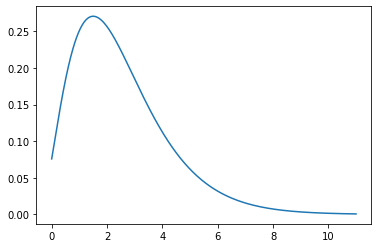

In [1]:
from matplotlib.pyplot import plot, hist
import numpy as np
from scipy.special import gamma, factorial


x = np.linspace(0, 11, 11*60)
k = 3
fn = lambda x, k: (np.power(x + 30/60, k-1) * np.exp(-x - 30/60) / gamma(k))
print(sum(fn(x, k)))

plot(x, fn(x,k));

12258
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['Dropper', 'Tornado', 'BumpCars', 'SlowRiver', 'StarWarsRide', 'SpaceMountain']
['Tourist']


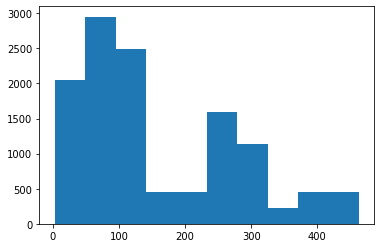

In [6]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

# np.random.seed(41)

park = Park(
    function=fn
)

park.startDayBase(150000)

print(len(park.guests))

y = [guest.arrivalTime for guest in park.guests]

hist(y);

print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guestArchetypes])

In [7]:
park.guests[1000].report()

"id: 1000  arvTime: 26 thingsDone: ['TakePictures'] attrExp: 0 "